# Understanding the Russell Data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [5]:
# Load in the data files
daily_prices = pd.read_csv("russell_3k_updated/russell_3k_daily_prices.csv", index_col=0)

In [10]:
daily_prices.shape

(5705612, 8)

In [9]:
daily_prices.tail(25)

,Price,Adj Close,Close,High,Low,Open,Volume,Ticker
2492,2025-05-14,2.0999999046325684,2.0999999046325684,2.2100000381469727,2.0999999046325684,2.1700000762939453,101600,ZYXI
2493,2025-05-15,2.190000057220459,2.190000057220459,2.25,2.069999933242798,2.0899999141693115,152700,ZYXI
2494,2025-05-16,2.4800000190734863,2.4800000190734863,2.509999990463257,2.1600000858306885,2.2100000381469727,257800,ZYXI
2495,2025-05-19,2.359999895095825,2.359999895095825,2.450000047683716,2.3299999237060547,2.450000047683716,81600,ZYXI
2496,2025-05-20,2.4700000286102295,2.4700000286102295,2.5199999809265137,2.3299999237060547,2.3399999141693115,106500,ZYXI
2497,2025-05-21,2.2699999809265137,2.2699999809265137,2.4600000381469727,2.2699999809265137,2.4200000762939453,115300,ZYXI
2498,2025-05-22,2.299999952316284,2.299999952316284,2.380000114440918,2.2100000381469727,2.259999990463257,132000,ZYXI
2499,2025-05-23,2.390000104904175,2.390000104904175,2.4000000953674316,2.2300000190734863,2.2300000190734863,121900,ZYXI
2500,2025-05-27,2.5899999141693115,2.5899999141693115,2.6600000858306885,2.4000000953674316,2.4000000953674316,300900,ZYXI
2501,2025-05-28,2.490000009536743,2.490000009536743,2.609999895095825,2.4000000953674316,2.559999942779541,126900,ZYXI


# Fundamentals Dataset
- These might be the Static Variables

In [11]:
# load in the fundamentals file
fundamentals = pd.read_csv("russell_3k_updated/russell_3k_fundamentals.csv", index_col=0)
fundamentals.shape

(6850, 15)

In [13]:
fundamentals.head(10)

,Ticker,Year,MarketCap,TrailingPE,PriceToBook,PriceToSales,ReturnOnEquity,ReturnOnAssets,DebtToEquity,CurrentRatio,ProfitMargin,EpsGrowth5Y,RevenueGrowth,EpsGrowthYoY,Unnamed: 0
0,AA,2024,9.259132e+09,154.318868,1.795449,0.778405,0.011635,0.004266,1.727167,NaN,0.005044,NaN,NaN,NaN,NaN
1,AA,2023,8.118999e+09,-12.471581,1.909903,0.769500,-0.153140,-0.045991,2.329805,NaN,-0.061700,NaN,-0.112989,-11.850000,NaN
2,AA,2022,1.262791e+10,-102.665966,2.487769,1.014209,-0.024232,-0.008336,1.907013,NaN,-0.009879,NaN,0.180078,0.811060,NaN
3,AA,2021,1.555231e+10,36.252476,3.328834,1.279815,0.091824,0.028552,2.215967,NaN,0.035303,NaN,-0.024014,4.487805,NaN
0,AAL,2024,1.160741e+10,13.720345,-2.918635,0.214115,-0.212723,0.013693,-16.535077,NaN,0.015606,NaN,NaN,NaN,NaN
1,AAL,2023,9.483783e+09,11.537448,-1.823103,0.179658,-0.158016,0.013036,-13.121876,NaN,0.015572,NaN,-0.026249,-0.028369,NaN
2,AAL,2022,9.635470e+09,75.869843,-1.661574,0.196759,-0.021900,0.001962,-12.159855,NaN,0.002593,NaN,-0.072308,-0.845499,NaN
3,AAL,2021,1.271539e+10,-6.380026,-1.732342,0.425520,0.271526,-0.029985,-10.055450,NaN,-0.066696,NaN,-0.389802,-16.692913,NaN
0,AAON,2024,9.757277e+09,57.886419,11.832998,8.126764,0.204418,0.143426,0.425248,NaN,0.140392,-0.686,NaN,NaN,NaN
1,AAON,2023,5.879148e+09,33.099024,7.996404,5.031286,0.241590,0.188672,0.280475,NaN,0.152007,-0.686,-0.026750,0.053773,NaN


# Gics Sectors

In [14]:
# load in the Gics sectors
gics_sectors = pd.read_csv("russell_3k_updated/russell_3k_gics_sectors.csv", index_col=0)
gics_sectors.shape

(2651, 1)

In [15]:
gics_sectors.head(10)

,Sector
Ticker,
MSFT,Technology
NVDA,Technology
AAPL,Technology
AMZN,Consumer Cyclical
META,Communication Services
AVGO,Technology
GOOGL,Communication Services
TSLA,Consumer Cyclical
BRKB,NaN


<Axes: title={'center': 'GICS Sector Distribution'}, xlabel='Sector'>

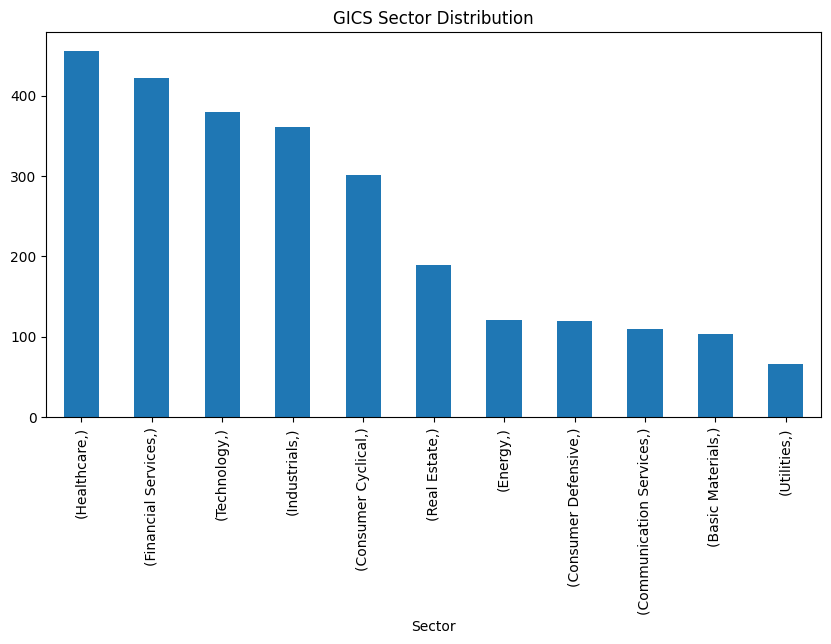

In [16]:
gics_sectors.value_counts().plot(kind='bar', figsize=(10, 5), title="GICS Sector Distribution")